In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

0: 640x640 1 capacitor, 6 connectors, 10 integrated circuits, 1 oscillator, 1 processor, 1 transistor, 2088.3ms
Speed: 15.5ms preprocess, 2088.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


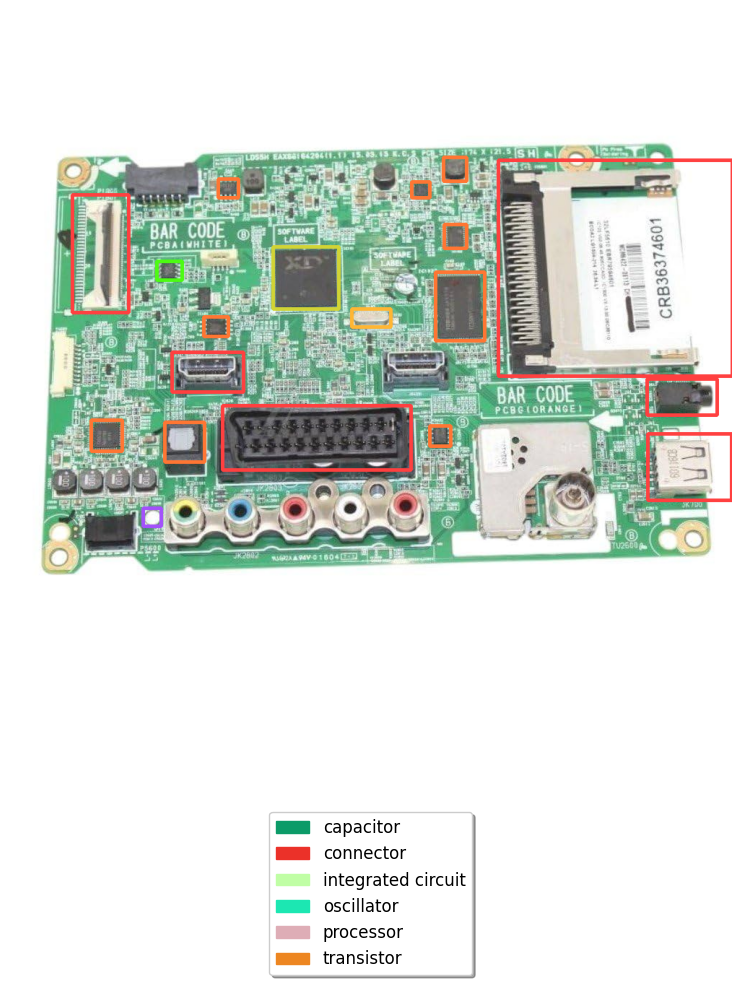

'result.jpg'

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import supervision as sv # Import supervision
import matplotlib.patches as mpatches
import numpy as np # Import numpy

drive.mount('/content/drive')
# Charger le modèle entraîné
model = YOLO('/content/drive/MyDrive/Colab Notebooks/yolo11mv2.pt')  # change le chemin si nécessaire

# Charger une image de test (tu peux remplacer par ton propre chemin)
image_path = '/content/drive/MyDrive/Colab Notebooks/test.jpg'

# Lire l'image
img = cv2.imread(image_path)

# Faire une prédiction avec le modèle YOLOv11
results = model.predict(source=img, conf=0.25)

# Get results as Supervision Detections
detections = sv.Detections.from_ultralytics(results[0])

# Annotate the image: bounding boxes
box_annotator = sv.BoxAnnotator(thickness=4)
annotated_image = box_annotator.annotate(scene=img.copy(), detections=detections)

# Convert BGR to RGB for matplotlib display
annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Afficher les résultats avec matplotlib for legend
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(annotated_image_rgb)
ax.axis('off')

# Create legend patches
legend_patches = []
class_names = model.names # Get class names from the model

# Get unique class IDs in the detections
detected_class_ids = set(detections.class_id)

# Instantiate ColorPalette with a list of colors
# Generate a list of unique colors for each detected class
colors = [tuple(np.random.randint(0, 256, 3).tolist()) for _ in range(len(class_names))]
color_palette = sv.ColorPalette(colors=colors)


for class_id in detected_class_ids:
    class_name = class_names[class_id]
    # Get the color used by supervision for this class.
    # Access color directly and convert to sv.Color
    color = sv.Color(*color_palette.colors[class_id]).as_bgr()
    # Convert BGR to RGB for matplotlib patch
    color_rgb = (color[2]/255, color[1]/255, color[0]/255)
    patch = mpatches.Patch(color=color_rgb, label=class_name)
    legend_patches.append(patch)

# Add legend below the plot
ax.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.1), # Adjusted bbox_to_anchor
          fancybox=True, shadow=True, ncol=max(1, len(legend_patches) // 5), fontsize='large') # Added fontsize

plt.tight_layout()
plt.show()

# Sauvegarder les résultats
results[0].save('result.jpg')